In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [49]:
cd /content/drive/My Drive/machine_learning_cl

/content/drive/My Drive/machine_learning_cl


In [77]:
import csv

#train data
x_data = []
y_data = []
z_data = []
h_data = []

#test_data
xt_data = []
yt_data = []
zt_data = []
ht_data = []

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
      x_data.append(float(i[0]))
      y_data.append(float(i[1]))
      z_data.append(float(i[2]))
      h_data.append(float(i[3]))
      #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
      ct += 1


with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        xt_data.append(float(i[0]))
        yt_data.append(float(i[1]))
        zt_data.append(float(i[2]))
        ht_data.append(float(i[3]))
        #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1

print(xt_data)
print(type(xt_data))

[-1.7888936425100344, 2.9581743142333643, -0.5694896788138601, 4.279318140013612, 0.12597468175861692, 3.6725284790568056, 8.593131319642193, 6.932055358608461, 5.7725624399182, 5.249971848029935, 5.494284358098707, 8.419997874673692, 11.793895799920392, 12.980307976028744, 18.068695533205588, 15.114110104569718, 14.226909556662353, 15.377816020874072, 22.693440549837824, 15.655532934093886, 21.397324686962207, 16.39046389976477, 21.537273035910072, 20.99851872792361, 23.8280260927594, 26.959262840877173, 21.023603021275736, 30.974257437486983, 29.13238303215022, 24.75044035296203, 31.424763637713838, 34.8260338401136, 29.97897709539002, 32.42615289862193, 35.02547550460792, 31.810801341812518, 33.21031649751856, 38.73389292863238, 42.192492762081926, 41.123216304582414, 37.04552392632304, 42.34457914932814, 45.01059509473721, 42.32746398642104, 41.22928810614917, 47.132069949831504, 48.578182309015176, 50.75173899827689, 44.02807643216319, 48.61767351130295, 50.7083549692937, 46.83083

In [0]:
import numpy as np
import random 
import matplotlib.pyplot as plt

#Hypothesis & Object function


Hypothesis (Linear Model)

$$f_\theta(x,y,z)=\theta_0+\theta_1x + \theta_2y + \theta_3y, \\
where\\ \theta = (\theta_0, \theta_1, \theta_2, \theta_3) \in R $$

Objective funtion(cost function)
$$
J(\theta)=\frac{1}{2m} \sum_{i=1}^m (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)})^2
$$

In [0]:
x = np.array(x_data)
y = np.array(y_data)
z = np.array(z_data)
H = np.array(h_data)

## hypothesis
def h(th0, th1, th2, th3, x, y, z):
    hypo = th0 + th1*(x) + th2*(y) + th3*(z)
    return hypo

## cost function
def J(th0, th1, th2, th3, ep_val, x, y, z):
    cost = (1/(2*len(x)))*np.sum((h(th0, th1, th2, th3, x, y, z)-ep_val)**2)
    return cost


# Training Data - GD Algorithm for linear regression
$$
\theta_0^{(t+1)} : = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)})
$$
$$
\theta_1^{(t+1)} : = \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)}) x^{(i)}
$$
$$
\theta_2^{(t+1)} : = \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)}) y^{(i)}
$$
$$
\theta_3^{(t+1)} : = \theta_3^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)}) z^{(i)}
$$

In [169]:
# list for graph 
list_th0 = []
list_th1 = []
list_th2 = []
list_th3 = []
list_J = []

## settings for GD algorithm
itr = np.arange(20000)+1
th0 = -1
th1 = -1  
th2 = -1
th3 = -1
a = 0.000022

### GD Algorithm 
## performing gd algorithm - training 

for iteration in np.ndenumerate(itr):

    cost = J(th0, th1, th2, th3, H, x, y, z)
    list_th0.append(th0)
    list_th1.append(th1)
    list_th2.append(th2)
    list_th3.append(th3)
    list_J.append(cost)

    temp0 = th0 - a *(1/len(x_data))*np.sum((h(th0, th1, th2, th3, x, y, z)-H))
    temp1 = th1 - a *(1/len(x_data))*np.sum((h(th0, th1, th2, th3, x, y, z)-H)*(x))
    temp2 = th2 - a *(1/len(x_data))*np.sum((h(th0, th1, th2, th3, x, y, z)-H)*(y))
    temp3 = th3 - a *(1/len(x_data))*np.sum((h(th0, th1, th2, th3, x, y, z)-H)*(z))

    th0 = temp0
    th1 = temp1
    th2 = temp2
    th3 = temp3

    print("iteration : ", iteration)
    print("cost : ", cost)
    print("theta0 : ", th0, "theta1 : ", th1, "theta2 : ", 
          th2, "theta3 : ", th3 )


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
theta0 :  -1.0159497770294033 theta1 :  0.7931323850984803 theta2 :  -1.795047514988296 theta3 :  4.007490692552314
iteration :  ((18334,), 18335)
cost :  103.45771428629577
theta0 :  -1.0159507427669838 theta1 :  0.7931325611674495 theta2 :  -1.795047674859686 theta3 :  4.0074906809978135
iteration :  ((18335,), 18336)
cost :  103.45771424132643
theta0 :  -1.015951708498534 theta1 :  0.7931327371587492 theta2 :  -1.7950478346595358 theta3 :  4.007490669449496
iteration :  ((18336,), 18337)
cost :  103.4577141963599
theta0 :  -1.015952674224054 theta1 :  0.7931329130724148 theta2 :  -1.795047994387875 theta3 :  4.0074906579073595
iteration :  ((18337,), 18338)
cost :  103.45771415139616
theta0 :  -1.0159536399435447 theta1 :  0.7931330889084786 theta2 :  -1.7950481540447356 theta3 :  4.007490646371401
iteration :  ((18338,), 18339)
cost :  103.45771410643519
theta0 :  -1.0159546056570061 theta1 :  0.7931332646669751 theta2 :  -1.7950483136301474 thet

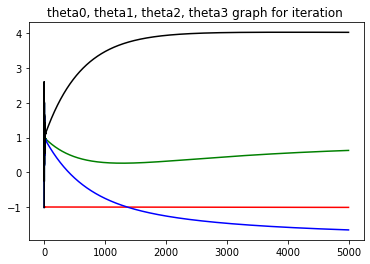

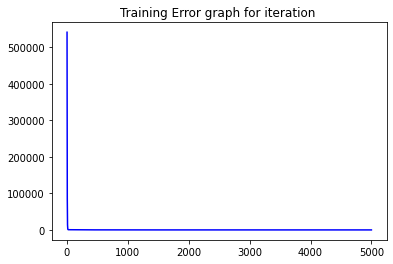

In [153]:

#theta0, theta1, theta2, theta3
plt.title("theta0, theta1, theta2, theta3 graph for iteration ")
plt.plot(itr, np.array(list_th0), color = 'red')
plt.plot(itr, np.array(list_th1), color = 'green')
plt.plot(itr, np.array(list_th2), color = 'blue')
plt.plot(itr, np.array(list_th3), color = 'black')
plt.show()


#J(th0, th1, th2, th3 )
plt.title("Training Error graph for iteration ")
plt.plot(itr, np.array(list_J), color = 'blue' )
plt.show()

# Testing - GD Algorithm for linear regression

In [162]:
print(th0, th1, th2, th3)

-1.0005790849740381 0.6330752986983995 -1.6467904251289032 4.019393751370577


In [164]:
# data and parameter for testing 
xt = np.array(xt_data)
yt = np.array(yt_data)
zt = np.array(zt_data)
Ht = np.array(ht_data)

th0_t = th0
th1_t = th1
th2_t = th2
th3_t = th3

# Testing loss

list_th0_t = []
list_th1_t = []
list_th2_t = []
list_th3_t = []
list_J_t = []
a = 0.00002

itr = np.arange(5000)+1

for iteration in np.ndenumerate(itr):
    
    cost = J(th0_t, th1_t, th2_t, th3_t, Ht, xt, yt, zt)

    list_th0_t.append(th0_t)
    list_th1_t.append(th1_t)
    list_th2_t.append(th2_t)
    list_th3_t.append(th3_t)
    list_J_t.append(cost)

    temp0 = th0_t - a *(1/len(x_data))*np.sum((h(th0_t, th1_t, th2_t, th3_t, xt, yt, zt)-Ht))
    temp1 = th1_t - a *(1/len(x_data))*np.sum((h(th0_t, th1_t, th2_t, th3_t, xt, yt, zt)-Ht)*(xt))
    temp2 = th2_t - a *(1/len(x_data))*np.sum((h(th0_t, th1_t, th2_t, th3_t, xt, yt, zt)-Ht)*(yt))
    temp3 = th3_t - a *(1/len(x_data))*np.sum((h(th0_t, th1_t, th2_t, th3_t, xt, yt, zt)-Ht)*(zt))

    th0_t = temp0
    th1_t = temp1
    th2_t = temp2
    th3_t = temp3

    print("iteration : ", iteration)
    print("cost : ", cost)
    print("theta0 : ", th0_t, "theta1 : ", th1_t, "theta2 : ", 
          th2_t, "theta3 : ", th3_t )

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
theta0 :  -0.9834266476727367 theta1 :  0.8956694006572742 theta2 :  -1.8977398664551888 theta3 :  4.006912161716623
iteration :  ((3334,), 3335)
cost :  0.3245261127778859
theta0 :  -0.9834216184986557 theta1 :  0.8957101083317861 theta2 :  -1.897776645378673 theta3 :  4.00690823429154
iteration :  ((3335,), 3336)
cost :  0.32437361482992016
theta0 :  -0.9834165893898453 theta1 :  0.8957508008933028 theta2 :  -1.8978134106134905 theta3 :  4.0069043082813165
iteration :  ((3336,), 3337)
cost :  0.3242212292956094
theta0 :  -0.9834115603462911 theta1 :  0.8957914783473939 theta2 :  -1.8978501621647892 theta3 :  4.006900383685531
iteration :  ((3337,), 3338)
cost :  0.3240689560914421
theta0 :  -0.9834065313679785 theta1 :  0.8958321406996289 theta2 :  -1.8978869000377132 theta3 :  4.006896460503764
iteration :  ((3338,), 3339)
cost :  0.3239167951339765
theta0 :  -0.9834015024548933 theta1 :  0.8958727879555741 theta2 :  -1.8979236242374053 theta3 :  

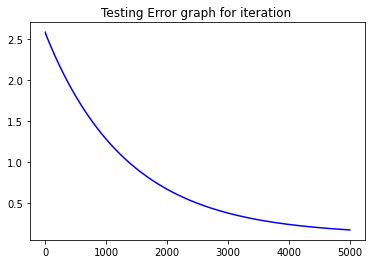

In [165]:

#J(th0, th1, th2, th3 )
plt.title("Testing Error graph for iteration ")
plt.plot(itr, np.array(list_J_t), color = 'blue' )
plt.show()

In [40]:
J

[-1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273
 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273
 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273
 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273
 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273
 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273
 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273
 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273
 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273
 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273
 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273
 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273
 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1.01580273
 -1.01580273 -1.01580273 -1.01580273 -1.01580273 -1